In [2]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=1,suppress=True)

# Sujet 02 : Régime Alimentaire

On utilisera les données contenues dans le fichier `Aliments.csv` dans la suite.

1. Les besoins  journaliers de Marie sont les suivants :
- Kcal : 2000kcal (F)
- Protéines : 75g (F)
- Glucides : 225g (F)
- Lipides : 90g (F)
- Fer : 9mg (F) 
- Calcium : 0.8g (F)
- Fibre : 45g (F)

**Comment doit-elle satisfaire ses besoins si elle veut minimiser son budget?**

2. Comment procéder si elle ne veut pas dépasser de plus de 10% les apports journaliers?

Reformumation du problème et mise en place des, étapes à suivre.
On considère que les régimes ne doivent pas apporter moins que ces quantités.

1) Proposer le régime journalier le moins cher pour marie et pour les femmes en général.

2) Même question en considérant que les différents critéres ne doivent pas dépasser 1.1 fois (10%) la dose recommandé.

3) Dans le but d 'un régime, on souhaite minimiser son budget, mais aussi minimiser les calories sans s'opposer aux autres contraintes. Le faire sans contraintes de budget (H et F) puis avec différents niveaux de contraintes journalières. 

4) Faire une étude détaillé  du menu proposé.

On commence par charger le fichier de donnée dans un data frame (avec panda)

In [3]:
Al=pd.read_csv('./Aliments.csv',sep=';',index_col=0)

In [4]:
Al.head()

,Protéines (en g),Lipides (en g),Glucides (en g),Energie (kcal),Fer (mg),Calcium (mg),Fibres (en g),Prix €/100g
Produit (100g),,,,,,,,
Lait – Emmental,26.93,27.80,5.38,380,0.20,791.0,0.0,1.30
Lait – crème fraîche,20.90,35.00,2.84,328,0.03,66.3,0.0,0.84
Lait – Petit-suisse,9.40,9.45,3.30,136,0.20,112.0,0.0,0.44
Lait – Lait entier (vache),3.15,3.25,4.80,61,0.30,113.0,0.0,0.28
Lait – Lait entier (chèvre),3.56,4.14,4.45,69,0.05,134.0,0.0,0.70


# Question 1

a) Détermination des matrices de travail.

In [5]:
A=np.array(Al).T
coeff=A[:-1] ## matrice des coefficients
z_ori=A[-1]### coefficients de la fonction de coût (prix)
betaF=np.array([75,90,225,2000,9,800,45]) ## second membre pour les femmes
# 2000kcal, 75g prot, 225g glu, 90g lip, 9mg fer, 800mg calc, 45g fibre

## Formalisation mathématique du problème

N = 41 Nombres d'aliments

P = 8 Nombre de nutriments

$\beta i$  $\forall i \in [1;P]$ est le besoin journalier en nutriments

$C_{ij}$ $\forall i \in [1;N]$ et $\forall j \in [1,P]$ est l'apport du i-ème aliment par rapport au j-ème nutriment : soit 100g du i-ème aliment apporte $C_{ij}$ grammes du j-ème nutriment.

$Pi$ $\forall i \in [1;N]$ est le prix au 100g du i-ème aliment.

$qi$ $\forall$ i $\in [1;N]$ est la quantité achetée/consommée du i-ème aliment.

$\sum_{i=1}^{N} C_{ij} q_i \geq$ $\beta_j$   $\forall j \in [1;P]$ avec $q_i \geq 0$   $\forall i \in [1;N]$

$z$ = $\min \sum_{i=1}^{N} p_i q_i$ est le coût minimum du repas.

**Traduction en linprog**

z_ori = z ce sont les coéffiscients d'une fonction linéaire à minimiser, ici c'est le vecteur de la 8-ème colonne contennant les prix ($Pi$).

A_ub = -coeff est une matrice (tableau-2D) contenant les coéficients de la contrainte d'inégalité, contraints en $x$ avec A_ub $\times$ $x$ $\leq$ b_ub, c'est pourquoi ici on a mis un moins devant coeff car nous on veut que les besoins journaliers soient au minimum satisfait si ce n'est plus. Précédement appellé $C_{ij}$ $\times$ $qi$

b_ub = -betaF est le vecteur des besoins journaliers en nutriments. Préccédement noté $\beta i$. Là encore on a mis un moins devant coeff car nous on veut que les besoins journaliers soient au minimum satisfait si ce n'est plus.

bounds = les contraintes de quantités que l'on pourra imposer ou non à un ou plusieurs aliments.

b) On utilise scipy.optimize

In [6]:
import scipy.optimize as so

In [7]:
RESULTF=so.linprog(z_ori, A_ub=-coeff, b_ub=-betaF,method='simplex') 
RESULTF
so.linprog

C:\Users\karl\AppData\Local\Temp\ipykernel_18472\2621746166.py:1: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  RESULTF=so.linprog(z_ori, A_ub=-coeff, b_ub=-betaF,method='simplex')


<function scipy.optimize._linprog.linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None, method='highs', callback=None, options=None, x0=None, integrality=None)>

In [8]:
RESULTF.fun ##cout minimal

2.052827380785162

In [9]:
A=RESULTF.x ##valeurs réalisant l'optimum
A

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.3,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. , 13.5,  0. ,  0. ])

b) Calculons maintenant le data frame calculant les apports de ce repas.

In [10]:
u,=A.nonzero()
REST=Al.iloc[u,:]
display(REST)
QTE=pd.DataFrame({'Quantités en g' : 100*A[A.nonzero()]}).set_index(Al.iloc[u,:].index)
display(QTE)

,Protéines (en g),Lipides (en g),Glucides (en g),Energie (kcal),Fer (mg),Calcium (mg),Fibres (en g),Prix €/100g
Produit (100g),,,,,,,,
Lait – Beurre,0.85,81.11,0.06,717,0.02,24.0,0.0,1.18
Base – Haricots blancs,5.54,5.15,21.63,155,1.99,61.0,5.5,0.13


,Quantités en g
Produit (100g),
Lait – Beurre,25.248785
Base – Haricots blancs,1349.916703


In [11]:

BILAN=pd.DataFrame((np.array(REST).T*A[A.nonzero()]).T).set_index(QTE.index)
REPAS=pd.concat([QTE,BILAN],axis=1)
REPAS=REPAS.append([REPAS.sum()])
Namescol=['Quantité (en g)']+list(Al.columns)
Namescol[-1]='Prix (en €)'
REPAS.columns=Namescol
Namesrow=list(QTE.index)
Namesrow.append('Apports du repas')
REPAS.index=Namesrow
display(REPAS)

C:\Users\karl\AppData\Local\Temp\ipykernel_18472\921585303.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  REPAS=REPAS.append([REPAS.sum()])


,Quantité (en g),Protéines (en g),Lipides (en g),Glucides (en g),Energie (kcal),Fer (mg),Calcium (mg),Fibres (en g),Prix (en €)
Lait – Beurre,25.248785,0.214615,20.47929,0.015149,181.033791,0.005050,6.059708,0.000000,0.297936
Base – Haricots blancs,1349.916703,74.785385,69.52071,291.986983,2092.370889,26.863342,823.449189,74.245419,1.754892
Apports du repas,1375.165488,75.000000,90.00000,292.002132,2273.404680,26.868392,829.508897,74.245419,2.052827


On en fait une fonction

In [12]:
def apports(RESULT):
    A=RESULT.x
    u,=A.nonzero()
    REST=Al.iloc[u,:]
    QTE=pd.DataFrame({'Quantités en g' : 100*A[A.nonzero()]}).set_index(Al.iloc[u,:].index)
    BILAN=pd.DataFrame((np.array(REST).T*A[A.nonzero()]).T).set_index(QTE.index)
    REPAS=pd.concat([QTE,BILAN],axis=1)
    REPAS=REPAS.append([REPAS.sum()])
    Namescol=['Quantité (en g)']+list(Al.columns)
    Namescol[-1]='Prix (en €)'
    REPAS.columns=Namescol
    Namesrow=list(QTE.index)
    Namesrow.append('Apports du repas')
    REPAS.index=Namesrow

    return REPAS

In [13]:
REPAS=apports(RESULTF)
display(REPAS.iloc[-1,0])

C:\Users\karl\AppData\Local\Temp\ipykernel_18472\2694851566.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  REPAS=REPAS.append([REPAS.sum()])


1375.165487978005

c) Présentation des résultats

In [14]:
##Présentation naive##
u,=A.nonzero()
for k in u :
    print(Al.index[k])
    print('{:0.2f} g'.format(A[k]*100))

Lait – Beurre
25.25 g
Base – Haricots blancs
1349.92 g


In [15]:
##Cette fonction permet d'enlever le type de chaque aliment
def rename_aliment(old_name):
    new_name=old_name.replace("Lait – ", "")
    new_name=new_name.replace("Viande – ", "")
    new_name=new_name.replace("Poisson – ", "")
    new_name=new_name.replace("Légume – ", "")
    new_name=new_name.replace("Base – ", "")
    return new_name

In [16]:
Phrase='Un repas est constitué de '
for s in range(len(u)-1):
    if s>0 : Phrase+=','
    gr=A[A.nonzero()][s]*100
    old_name=Al.iloc[u].index[s]
    name = rename_aliment(old_name)
    Phrase+=' de {:0.2f} g de {}'.format(gr,name)
s=len(u)-1    
gr=A[A.nonzero()][s]*100
old_name=Al.iloc[u].index[s]
name = rename_aliment(old_name)
Phrase+=' et de {:0.2f} g de {}. '.format(gr,name)
Phrase+=' Il coûte un total de {:0.2f} euros.'.format(RESULTF.fun)
print(Phrase)

Un repas est constitué de  de 25.25 g de Beurre et de 1349.92 g de Haricots blancs.  Il coûte un total de 2.05 euros.


Mettons cela dans une fonction.

In [17]:
def repas(RESULT):
    A=RESULT.x
    u,=A.nonzero()
    Qt=A[u]
    Phrase='Un repas est constitué de '
    for s in range(len(u)-1):
        if s>0 : Phrase+=','
        gr=Qt[s]*100
        old_name=Al.iloc[u].index[s]
        name = rename_aliment(old_name)
        Phrase+=' de {:0.2f} g de {}'.format(gr,name)
    s=len(u)-1    
    gr=Qt[s]*100
    old_name=Al.iloc[u].index[s]
    name = rename_aliment(old_name)
    Phrase+=' et de {:0.2f} g de {}. '.format(gr,name)
    REPAS=apports(RESULT)
    Phrase+=' Il coûte un total de {:0.2f} euros et comprend {:0.2f} calories.'.format(RESULT.fun,REPAS['Energie (kcal)'][-1])
    print(Phrase)

In [18]:
# RESULTF=so.linprog(z_ori, A_ub=-coeff, b_ub=-betaF,method='simplex') 
print('Pour les femmes.')
repas(RESULTF)

Pour les femmes.
Un repas est constitué de  de 25.25 g de Beurre et de 1349.92 g de Haricots blancs.  Il coûte un total de 2.05 euros et comprend 2273.40 calories.


C:\Users\karl\AppData\Local\Temp\ipykernel_18472\2694851566.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  REPAS=REPAS.append([REPAS.sum()])


# Question 2

In [20]:
RESULTFb=so.linprog(z_ori, A_ub=np.concatenate((-coeff,coeff),axis=0), b_ub=np.concatenate((-betaF,1.5*betaF),axis=0),method='simplex') 
print('Pour les femmes avec des contraintes supplémentaires.')
repas(RESULTFb)

Pour les femmes avec des contraintes supplémentaires.
Un repas est constitué de  de 7.19 g de crème fraîche, de 42.66 g de Gruyère, de 57.44 g de Beurre, de 347.57 g de Courge, de 449.99 g de Haricots blancs et de 260.79 g de Semoule.  Il coûte un total de 3.41 euros et comprend 2442.61 calories.


C:\Users\karl\AppData\Local\Temp\ipykernel_18472\3272262317.py:1: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  RESULTFb=so.linprog(z_ori, A_ub=np.concatenate((-coeff,coeff),axis=0), b_ub=np.concatenate((-betaF,1.5*betaF),axis=0),method='simplex')
C:\Users\karl\AppData\Local\Temp\ipykernel_18472\2694851566.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  REPAS=REPAS.append([REPAS.sum()])


In [21]:
np.concatenate((-betaF,1.5*betaF),axis=0)

array([  -75. ,   -90. ,  -225. , -2000. ,    -9. ,  -800. ,   -45. ,
         112.5,   135. ,   337.5,  3000. ,    13.5,  1200. ,    67.5])

Analyse additionelle en s'approchant au mieux du minimum.


In [22]:
for k in [30,20,10,5,4,3,2,1.5,1.4,1.3,1.2,1.1,1.09,1.08,1.0787]:
    RESULTFb=so.linprog(z_ori, A_ub=np.concatenate((-coeff,coeff),axis=0), b_ub=np.concatenate((-betaF,k*betaF),axis=0),method='simplex') 
    if RESULTFb.success==True:
        print('\nPour les femmes avec des contraintes supplémentaires entre le minimum et {} fois le minimum.'.format(k))
        repas(RESULTFb)
    else : print('\nRepas impossible pour {} fois le minimum'.format(k))        

C:\Users\karl\AppData\Local\Temp\ipykernel_18472\471151127.py:2: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  RESULTFb=so.linprog(z_ori, A_ub=np.concatenate((-coeff,coeff),axis=0), b_ub=np.concatenate((-betaF,k*betaF),axis=0),method='simplex')
C:\Users\karl\AppData\Local\Temp\ipykernel_18472\2694851566.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  REPAS=REPAS.append([REPAS.sum()])
C:\Users\karl\AppData\Local\Temp\ipykernel_18472\471151127.py:2: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  RESULTFb=so.linprog(z_ori, A_ub=np.concatenate((-coeff,coeff),axis=0), b_ub=np.concatenate((-betaF,k*betaF),axis=0),method='simplex')
C:\Users\karl\AppData\Local\Temp\ipyk


Pour les femmes avec des contraintes supplémentaires entre le minimum et 30 fois le minimum.
Un repas est constitué de  de 25.25 g de Beurre et de 1349.92 g de Haricots blancs.  Il coûte un total de 2.05 euros et comprend 2273.40 calories.

Pour les femmes avec des contraintes supplémentaires entre le minimum et 20 fois le minimum.
Un repas est constitué de  de 25.25 g de Beurre et de 1349.92 g de Haricots blancs.  Il coûte un total de 2.05 euros et comprend 2273.40 calories.

Pour les femmes avec des contraintes supplémentaires entre le minimum et 10 fois le minimum.
Un repas est constitué de  de 25.25 g de Beurre et de 1349.92 g de Haricots blancs.  Il coûte un total de 2.05 euros et comprend 2273.40 calories.

Pour les femmes avec des contraintes supplémentaires entre le minimum et 5 fois le minimum.
Un repas est constitué de  de 25.25 g de Beurre et de 1349.92 g de Haricots blancs.  Il coûte un total de 2.05 euros et comprend 2273.40 calories.

Pour les femmes avec des contraintes

C:\Users\karl\AppData\Local\Temp\ipykernel_18472\2694851566.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  REPAS=REPAS.append([REPAS.sum()])
C:\Users\karl\AppData\Local\Temp\ipykernel_18472\471151127.py:2: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  RESULTFb=so.linprog(z_ori, A_ub=np.concatenate((-coeff,coeff),axis=0), b_ub=np.concatenate((-betaF,k*betaF),axis=0),method='simplex')
C:\Users\karl\AppData\Local\Temp\ipykernel_18472\2694851566.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  REPAS=REPAS.append([REPAS.sum()])


In [26]:
n=10
for ks in range(n):
    k=1.078611+0.000001*ks/n
    RESULTFb=so.linprog(z_ori, A_ub=np.concatenate((-coeff,coeff),axis=0), b_ub=np.concatenate((-betaF,k*betaF),axis=0),method='simplex') 
    if RESULTFb.success==True:
        print('\nPour les femmes avec des contraintes supplémentaires entre le minimum et {} fois le minimum.'.format(k))
        repas(RESULTFb)
    else : print('\nRepas impossible pour {} fois le minimum'.format(k))    

C:\Users\karl\AppData\Local\Temp\ipykernel_8724\90071053.py:4: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  RESULTFb=so.linprog(z_ori, A_ub=np.concatenate((-coeff,coeff),axis=0), b_ub=np.concatenate((-betaF,k*betaF),axis=0),method='simplex')
C:\Users\karl\AppData\Local\Temp\ipykernel_8724\2694851566.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  REPAS=REPAS.append([REPAS.sum()])
C:\Users\karl\AppData\Local\Temp\ipykernel_8724\90071053.py:4: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  RESULTFb=so.linprog(z_ori, A_ub=np.concatenate((-coeff,coeff),axis=0), b_ub=np.concatenate((-betaF,k*betaF),axis=0),method='simplex')
C:\Users\karl\AppData\Local\Temp\ipykernel


Pour les femmes avec des contraintes supplémentaires entre le minimum et 1.078611 fois le minimum.
Un repas est constitué de  de 54.89 g de crème fraîche, de 55.60 g de Gruyère, de 59.28 g de Beurre, de 443.79 g de Courge, de 495.60 g de Haricots rouges et de 137.63 g de Semoule.  Il coûte un total de 5.57 euros et comprend 2000.00 calories.

Pour les femmes avec des contraintes supplémentaires entre le minimum et 1.0786111 fois le minimum.
Un repas est constitué de  de 54.89 g de crème fraîche, de 55.60 g de Gruyère, de 59.28 g de Beurre, de 443.79 g de Courge, de 495.60 g de Haricots rouges et de 137.63 g de Semoule.  Il coûte un total de 5.57 euros et comprend 2000.00 calories.

Pour les femmes avec des contraintes supplémentaires entre le minimum et 1.0786111999999999 fois le minimum.
Un repas est constitué de  de 54.89 g de crème fraîche, de 55.60 g de Gruyère, de 59.28 g de Beurre, de 443.79 g de Courge, de 495.60 g de Haricots rouges et de 137.63 g de Semoule.  Il coûte un tota

C:\Users\karl\AppData\Local\Temp\ipykernel_8724\2694851566.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  REPAS=REPAS.append([REPAS.sum()])
C:\Users\karl\AppData\Local\Temp\ipykernel_8724\90071053.py:4: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  RESULTFb=so.linprog(z_ori, A_ub=np.concatenate((-coeff,coeff),axis=0), b_ub=np.concatenate((-betaF,k*betaF),axis=0),method='simplex')
C:\Users\karl\AppData\Local\Temp\ipykernel_8724\2694851566.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  REPAS=REPAS.append([REPAS.sum()])
C:\Users\karl\AppData\Local\Temp\ipykernel_8724\90071053.py:4: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of

# QUESTION 3

In [27]:
Al.iloc[25,:]

Protéines (en g)     0.66
Lipides (en g)       0.34
Glucides (en g)     14.34
Energie (kcal)      56.00
Fer (mg)             0.36
Calcium (mg)         9.00
Fibres (en g)        2.90
Prix €/100g          0.32
Name: Légume – Courge, dtype: float64

In [23]:
A=np.array(Al).T
coeff=A[[0,1,2,3,4,5,6]] ## matrice des coefficients
z_ori=A[7]### coefficients de la fonction de coût
betaF=np.array([75,90,225,9,800,45,0]) ## second membre pour les femmes

In [45]:
A[3]

array([380., 328., 136.,  61.,  69., 413., 300., 268., 717.,  63., 289.,
       178., 283., 200., 206., 247., 339., 222., 232., 208., 262.,  35.,
        35.,  41.,  23.,  56.,  42.,  15.,  38.,  23.,  86., 124., 112.,
        83., 319., 158., 130.,  85., 155., 116., 360.])

In [29]:
z_ori

array([380., 328., 136.,  61.,  69., 413., 300., 268., 717.,  63., 289.,
       178., 283., 200., 206., 247., 339., 222., 232., 208., 262.,  35.,
        35.,  41.,  23.,  56.,  42.,  15.,  38.,  23.,  86., 124., 112.,
        83., 319., 158., 130.,  85., 155., 116., 360.])

In [24]:
RESULTF=so.linprog(z_ori, A_ub=-coeff, b_ub=-betaF,method='simplex') 
print('Pour les femmes.')
repas(RESULTF)

Pour les femmes.
Un repas est constitué de  et de 24024.02 g de Lentilles.  Il coûte un total de 38.44 euros et comprend 27867.87 calories.


C:\Users\karl\AppData\Local\Temp\ipykernel_18472\3605301272.py:1: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  RESULTF=so.linprog(z_ori, A_ub=-coeff, b_ub=-betaF,method='simplex')
C:\Users\karl\AppData\Local\Temp\ipykernel_18472\2694851566.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  REPAS=REPAS.append([REPAS.sum()])


Ceci est incohérent, on doit réécrire les fonctions de résultats

In [25]:
def repas_regime(RESULT):
    A=RESULT.x
    u,=A.nonzero()
    Qt=A[u]
    Phrase='Un repas est constitué de '
    for s in range(len(u)-1):
        if s>0 : Phrase+=','
        gr=Qt[s]*100
        old_name=Al.iloc[u].index[s]
        name = rename_aliment(old_name)
        Phrase+=' de {:0.2f} g de {}'.format(gr,name)
    s=len(u)-1    
    gr=Qt[s]*100
    old_name=Al.iloc[u].index[s]
    name = rename_aliment(old_name)
    Phrase+=' et de {:0.2f} g de {}. '.format(gr,name)
    REPAS=apports(RESULT)
    Phrase+=' Il coûte un total de {:0.2f} euros et comprend {:0.2f} calories.'.format(REPAS['Prix (en €)'][-1],REPAS['Energie (kcal)'][-1])
    print(Phrase)

In [26]:
bdns = [(0,None) for k in range(41)]
bdns[25] = (0,5)
RESULTF=so.linprog(z_ori, A_ub=-coeff, b_ub=-betaF,method='simplex') 
print('Pour les femmes.')
repas_regime(RESULTF)

Pour les femmes.
Un repas est constitué de  et de 24024.02 g de Lentilles.  Il coûte un total de 38.44 euros et comprend 27867.87 calories.


C:\Users\karl\AppData\Local\Temp\ipykernel_18472\2766501601.py:3: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  RESULTF=so.linprog(z_ori, A_ub=-coeff, b_ub=-betaF,method='simplex')
C:\Users\karl\AppData\Local\Temp\ipykernel_18472\2694851566.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  REPAS=REPAS.append([REPAS.sum()])


# QUESTION 4

Faire une étude détaillée en faisant évoluer le budget

In [28]:
A=np.array(Al).T
coeff=A[[0,1,2,3,4,5,6]]##matrice des coefficients,on a éliminé la colonne qui correspond aux calorie soit la colonne 4 indice 3
z_ori=A[7]### coefficients de la fonction de coût
betaF=np.array([75,90,225,9,800,45,-k]) ## second membre pour les femmes
coeff[-1]= -A[[7]]
bdns = [(0,None) for k in range(41)]
bdns[25] = (0,5)
bdns[5] = (0, 0.5)
RESULTF=so.linprog(z_ori, A_ub=-coeff, b_ub=-betaF,method='simplex',bounds = bdns)
repas_regime(RESULTF)

Un repas est constitué de  de 682.78 g de Haricots blancs et de 106.16 g de Semoule.  Il coûte un total de 1.08 euros et comprend 1440.48 calories.


C:\Users\karl\AppData\Local\Temp\ipykernel_18472\957215041.py:9: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  RESULTF=so.linprog(z_ori, A_ub=-coeff, b_ub=-betaF,method='simplex',bounds = bdns)
C:\Users\karl\AppData\Local\Temp\ipykernel_18472\2694851566.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  REPAS=REPAS.append([REPAS.sum()])


In [29]:
A=np.array(Al).T
coeff=A[[0,1,2,3,4,5,6]]##matrice des coefficients,on a éliminé la colonne qui correspond aux calorie soit la colonne 4 indice 3
z_ori=A[7]### coefficients de la fonction de coût
betaF=np.array([75,90,225,9,800,45,-k]) ## second membre pour les femmes
# coeff[-1]= -A[[7]]
bdns = [(0,None) for k in range(41)]
bdns[25] = (0,5)
RESULTF=so.linprog(z_ori, A_ub=-coeff, b_ub=-betaF,method='simplex',bounds = bdns)
repas_regime(RESULTF)

Un repas est constitué de  de 682.78 g de Haricots blancs et de 106.16 g de Semoule.  Il coûte un total de 1.08 euros et comprend 1440.48 calories.


C:\Users\karl\AppData\Local\Temp\ipykernel_18472\1953106979.py:8: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  RESULTF=so.linprog(z_ori, A_ub=-coeff, b_ub=-betaF,method='simplex',bounds = bdns)
C:\Users\karl\AppData\Local\Temp\ipykernel_18472\2694851566.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  REPAS=REPAS.append([REPAS.sum()])


In [35]:
Al.head(10)

,Protéines (en g),Lipides (en g),Glucides (en g),Energie (kcal),Fer (mg),Calcium (mg),Fibres (en g),Prix €/100g
Produit (100g),,,,,,,,
Lait – Emmental,26.93,27.80,5.380,380,0.20,791.0,0.0,1.30
Lait – crème fraîche,20.90,35.00,2.840,328,0.03,66.3,0.0,0.84
Lait – Petit-suisse,9.40,9.45,3.300,136,0.20,112.0,0.0,0.44
Lait – Lait entier (vache),3.15,3.25,4.800,61,0.30,113.0,0.0,0.28
Lait – Lait entier (chèvre),3.56,4.14,4.450,69,0.05,134.0,0.0,0.70
Lait – Gruyère,29.81,32.34,0.360,413,0.17,1011.0,0.0,1.18
Lait – Camembert,19.80,24.26,0.456,300,0.33,388.0,0.0,1.05
Lait – Fromage de Chévre frais,18.52,21.08,0.890,268,1.90,140.0,0.0,3.00
Lait – Beurre,0.85,81.11,0.060,717,0.02,24.0,0.0,1.18


In [36]:
A[:,5]

array([  29.8,   32.3,    0.4,  413. ,    0.2, 1011. ,    0. ,    1.2])

In [37]:
X=[]
for k in [2,4,6,8,10,12,14,16,18,20]:
    betaFE=np.array([75,90,225,9,800,45,-k])
    RESULTFE=so.linprog(z_ori, A_ub=-coeff, b_ub=-betaFE,method='simplex',bounds = bdns)
    if RESULTFE.success==True:
        print('\nPour les femmes avec un prix de {} euros.'.format(k))
        repas_regime(RESULTFE)
        qte=RESULTFE.x
        X.append(list(qte))
    else : print('\nRepas impossible pour le prix {} euros.'.format(k))

C:\Users\karl\AppData\Local\Temp\ipykernel_8724\651972437.py:4: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  RESULTFE=so.linprog(z_ori, A_ub=-coeff, b_ub=-betaFE,method='simplex',bounds = bdns)
C:\Users\karl\AppData\Local\Temp\ipykernel_8724\2694851566.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  REPAS=REPAS.append([REPAS.sum()])
C:\Users\karl\AppData\Local\Temp\ipykernel_8724\651972437.py:4: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  RESULTFE=so.linprog(z_ori, A_ub=-coeff, b_ub=-betaFE,method='simplex',bounds = bdns)
C:\Users\karl\AppData\Local\Temp\ipykernel_8724\2694851566.py:8: FutureWarning: The frame.append method is deprecated and will be removed 


Repas impossible pour le prix 2 euros.

Pour les femmes avec un prix de 4 euros.
Un repas est constitué de  de 127.18 g de crème fraîche, de 30.22 g de Gruyère, de 500.00 g de Courge, de 59.52 g de Base -  Pâtes Complètes, de 22.67 g de Frites et de 579.20 g de Haricots blancs.  Il coûte un total de 4.00 euros et comprend 1865.81 calories.

Pour les femmes avec un prix de 6 euros.
Un repas est constitué de  de 151.89 g de crème fraîche, de 15.65 g de Gruyère, de 500.00 g de Courge, de 204.91 g de Epinard, de 264.15 g de Maïs, de 50.61 g de Frites et de 336.86 g de Haricots blancs.  Il coûte un total de 6.00 euros et comprend 1800.74 calories.

Pour les femmes avec un prix de 8 euros.
Un repas est constitué de  de 157.14 g de crème fraîche, de 21.18 g de Beurre, de 159.81 g de Brocoli, de 500.00 g de Courge, de 350.85 g de Epinard, de 484.04 g de Maïs et de 155.70 g de Haricots blancs.  Il coûte un total de 8.00 euros et comprend 1741.53 calories.

Pour les femmes avec un prix de 10 eu

C:\Users\karl\AppData\Local\Temp\ipykernel_8724\2694851566.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  REPAS=REPAS.append([REPAS.sum()])
C:\Users\karl\AppData\Local\Temp\ipykernel_8724\651972437.py:4: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  RESULTFE=so.linprog(z_ori, A_ub=-coeff, b_ub=-betaFE,method='simplex',bounds = bdns)
C:\Users\karl\AppData\Local\Temp\ipykernel_8724\2694851566.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  REPAS=REPAS.append([REPAS.sum()])
C:\Users\karl\AppData\Local\Temp\ipykernel_8724\651972437.py:4: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in n

In [38]:
import matplotlib.pyplot as plt
import ipywidgets as wid

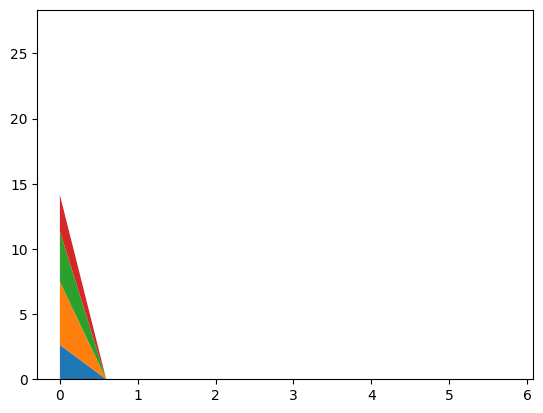

In [39]:
Xar=np.array(X)
plt.stackplot(Xar[0],Xar[1],Xar[2],Xar[3],Xar[4],Xar[5], baseline = 'zero')
plt.show()

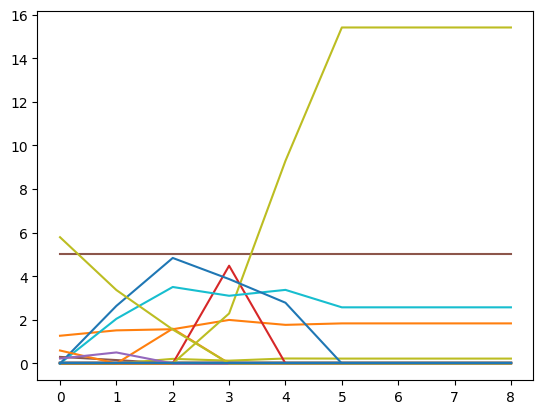

In [40]:
plt.plot(Xar)